In [1]:
import os
import glob
from pathlib import Path
l_path = Path('/kaggle/input/label/label')
i_path = Path('/kaggle/input/images/images')

labels_path = list(l_path.glob('*.xml'))
print(len(labels_path))

images_path_all = glob.glob('images/*/*.jpg')
len(images_path_all)

images_path = []
classes = ['punching_hole', 'welding_line', 'crescent_gap', 'water_spot', 'oil_spot', 'silk_spot', 'inclusion', 'rolled_pit', 'crease', 'waist folding']
class_list = []
for img in i_path.rglob("*.jpg"):
    for label in l_path.glob("*.xml"):
        #print(img.stem, label.stem)
        if img.stem == label.stem:
            images_path.append(img)
            for c in range(10):
                flag = False
                if classes[c] in str(img):
                    flag = True
                    class_list.append(c)
                    break
            if flag == False:
                print(img)
len(images_path)

2280


2280

In [2]:
len(labels_path), len(images_path), len(class_list)

(2280, 2280, 2280)

In [3]:
images_path = sorted(images_path, key=lambda x: x.stem)
labels_path = sorted(labels_path, key=lambda x: x.stem)

In [4]:
from sklearn.model_selection import train_test_split

images_path_train, images_path_test, labels_path_train, labels_path_test = train_test_split(images_path, labels_path, test_size=0.15, stratify = class_list)
class_list_train_val = []
for img in images_path_train:
    for c in range(10):
        if classes[c] in str(img):
            class_list_train_val.append(c)
            
#print(len(images_path_train), len(class_list_train_val))
images_path_train, images_path_val, labels_path_train, labels_path_val = train_test_split(images_path_train, labels_path_train, test_size=0.15, stratify = class_list_train_val)

In [5]:
len(images_path_train), len(labels_path_train), len(images_path_test), len(labels_path_test), len(images_path_val), len(labels_path_val)

(1647, 1647, 342, 342, 291, 291)

In [ ]:
# from sklearn.model_selection import train_test_split

# images_path_train, images_path_test, labels_path_train, labels_path_test = train_test_split(images_path, labels_path, test_size=0.15, shuffle=False,)
# class_list_train_val = []
# for img in images_path_train:
#     for c in range(10):
#         if classes[c] in str(img):
#             class_list_train_val.append(c)
            
# #print(len(images_path_train), len(class_list_train_val))
# # images_path_train, images_path_val, labels_path_train, labels_path_val = train_test_split(images_path_train, labels_path_train, test_size=0.15)

In [6]:
for label in labels_path_train:
    is_found = False
    for img in images_path_train:
        if img.stem == label.stem:
            is_found = True
            #print(img.name, label.name)
            break
    assert is_found

In [7]:
#convert xml to json

category_list = []
for c_id in range(10):
    ctgr_dict = {
        "id": c_id,
        "name": classes[c_id],
        "supercategory": "none"
    }
    category_list.append(ctgr_dict)
print(category_list)




[{'id': 0, 'name': 'punching_hole', 'supercategory': 'none'}, {'id': 1, 'name': 'welding_line', 'supercategory': 'none'}, {'id': 2, 'name': 'crescent_gap', 'supercategory': 'none'}, {'id': 3, 'name': 'water_spot', 'supercategory': 'none'}, {'id': 4, 'name': 'oil_spot', 'supercategory': 'none'}, {'id': 5, 'name': 'silk_spot', 'supercategory': 'none'}, {'id': 6, 'name': 'inclusion', 'supercategory': 'none'}, {'id': 7, 'name': 'rolled_pit', 'supercategory': 'none'}, {'id': 8, 'name': 'crease', 'supercategory': 'none'}, {'id': 9, 'name': 'waist folding', 'supercategory': 'none'}]


In [8]:
#чтобы не перебирать images_path в поисках image_id
# images_path = sorted(images_path, key=lambda x: x.stem)
# annotations_path = l_path.glob("*.xml")
# annotations_path = sorted(annotations_path, key=lambda x: x.stem)

images_path_train = sorted(images_path_train, key=lambda x: x.stem)
annotations_path_train = labels_path_train
annotations_path_train = sorted(annotations_path_train, key=lambda x: x.stem)

images_path_val = sorted(images_path_val, key=lambda x: x.stem)
annotations_path_val = labels_path_val
annotations_path_val = sorted(annotations_path_val, key=lambda x: x.stem)

images_path_test = sorted(images_path_test, key=lambda x: x.stem)
annotations_path_test = labels_path_test
annotations_path_test = sorted(annotations_path_test, key=lambda x: x.stem)

In [9]:
# def collect_images_text(images_path):
#     img_id = 0
#     images_text = '"images": ['
#     for img in images_path:
#         images_text += '\n' + '    {' + f'''
#             "id": {img_id},
#             "file_name": "{img.stem + '.jpg'}",
#             "height": 1000,
#             "width": 2048
#         '''
#         img_id += 1
#         if img_id == len(images_path):
#             images_text += '}'
#         else:
#             images_text += '},'
#     images_text += '\n],' + '\n'
#     return images_text
#print(images_text)
def collect_images(images_path):
    images_list = []
    img_id = 0
    for img in images_path:
        img_dict = {
            "id": img_id,
            "file_name": f"{img.stem}.jpg",
            "height": 1000,
            "width": 2048
        }
        images_list.append(img_dict)
        img_id += 1
    return images_list


In [10]:
images_text_train = collect_images(images_path_train)
images_text_test = collect_images(images_path_test)
images_text_val = collect_images(images_path_val)

In [ ]:
#print(images_text_test)

In [11]:
import xml.etree.ElementTree as ET
import re

def collect_annotation(annotations_path):
    an_id = 0
    annotation_list = []
    image_id = 0
    for a in annotations_path:
        tree = ET.parse(a)
        root = tree.getroot()
#         print(image_id)
#         print(im_list[image_id]['file_name'][:-4])
#        assert im_list[image_id]["file_name"][:-4] == a.stem, f"{image_id} - {im_list[image_id]['file_name'][:-4]} != {a.stem}"
        for object_element in root.findall(".//object"):
            #an_id += 1
            
            name_element = object_element.find("name")

            match = re.search(r'\d+', name_element.text)

            if match:
                category_id = int(match.group()) - 1

                bndbox_element = object_element.find("bndbox")

                xmin = int(bndbox_element.find("xmin").text)
                ymin = int(bndbox_element.find("ymin").text)
                xmax = int(bndbox_element.find("xmax").text)
                ymax = int(bndbox_element.find("ymax").text)

                width = (xmax - xmin)
                height = (ymax - ymin)
                
                annotation_dict = {
                    "id": an_id,
                    "image_id": image_id,
                    "category_id": category_id,
                    "bbox": [ xmin, ymin, width, height ],
                    "area": width*height,
                    "segmentation": [],
                    "iscrowd": 0}
                an_id += 1
                annotation_list.append(annotation_dict)
        image_id += 1
    #an_text = annotation_text[:-1]
    #an_text += '\n]'
    return annotation_list
    #print(an_text)

In [12]:
annotation_text_train = collect_annotation(annotations_path_train)
annotation_text_val = collect_annotation(annotations_path_val)
annotation_text_test = collect_annotation(annotations_path_test)

In [ ]:
#print(annotation_text_test)

In [13]:
import json
annotation_file_name = 'dataset.json'

coco_data_train = {
    "categories": category_list,
    "images": images_text_train,
    "annotations": annotation_text_train
}

coco_data_test = {
    "categories": category_list,
    "images": images_text_test,
    "annotations": annotation_text_test
}

coco_data_val = {
    "categories": category_list,
    "images": images_text_val,
    "annotations": annotation_text_val
}
# data_train = category_list + images_text_train + annotation_text_train
# data_val = category_list + images_text_val + annotation_text_val
# data_test = category_list + images_text_test + annotation_text_test

import shutil

train_directory = Path("/kaggle/working/train")
train_directory.mkdir(exist_ok=True)
test_directory = Path("/kaggle/working/test")
test_directory.mkdir(exist_ok=True)
val_directory = Path("/kaggle/working/val")
val_directory.mkdir(exist_ok=True)

with open(str(train_directory) + '/' + annotation_file_name, 'w') as json_file:
    json.dump(coco_data_train, json_file)

with open(str(val_directory) + '/' + annotation_file_name, 'w') as json_file:
    json.dump(coco_data_val, json_file)
    
with open(str(test_directory) + '/' + annotation_file_name, 'w') as json_file:
    json.dump(coco_data_test, json_file)

In [14]:
from typing import Union
from pathlib import Path
import shutil
import cv2

import numpy as np

def convert_to_three_channel(image):
    three_channel_image = np.stack([image] * 3, axis=-1)
    return three_channel_image

def copy_files(files: list, dst: Union[str, Path]):
    dst_path = Path(dst)
#     dst_path.mkdir(exist_ok=True)
    
    for file in files:
        image = cv2.imread(str(file), cv2.IMREAD_GRAYSCALE)
        
        three_channel_image = convert_to_three_channel(image)
        
        new_file_path = dst_path / file.name
        
        cv2.imwrite(str(new_file_path), three_channel_image)

copy_files(images_path_train, train_directory)
copy_files(images_path_val, val_directory)
copy_files(images_path_test, test_directory)


# from typing import Union
# # картинки
# def copy_files(files: list, dst: Union[str, Path]):
# #     dst_path = Path(dst)
# #     dst_path.mkdir(exist_ok=True)
    
#     for file in files:
#         shutil.copy(file, dst)

# copy_files(images_path_train, train_directiry)
# copy_files(images_path_val, val_directiry)
# copy_files(images_path_test, test_directiry)

In [ ]:
# from PIL import Image


# image = Image.open("/kaggle/working/train/img_03_3403402900_00962.jpg")


# num_channels = image.mode
# print("Number of channels:", num_channels)


In [15]:
pip install pycocotools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.2/426.2 kB 21.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [16]:
import transformers
from transformers import DetrImageProcessor
#import pytorch_lighting
import torch
import torchvision

class CocoDetection(torchvision.datasets.CocoDetection):
    def __init__(self, image_directory_path, image_processor, train: bool = True):
        annotation_file_path = os.path.join(image_directory_path, annotation_file_name)
        super(CocoDetection, self).__init__(image_directory_path, annotation_file_path)
        self.image_processor = image_processor
        
    def __getitem__(self, idx):
        img, target = super(CocoDetection, self).__getitem__(idx)

        image_id = self.ids[idx]
        target = {'image_id': image_id, 'annotations': target}
        encoding = self.image_processor(images=img, annotations=target, return_tensors="pt")
        pixel_values = encoding["pixel_values"].squeeze()
        #print('pixel_values', pixel_values)
        target = encoding["labels"][0]
        #print('target', target)

        return pixel_values, target
    
    
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")

dataset_path = '/kaggle/input/defects-class-and-location'

trn_dir = os.path.join('/kaggle/working/', 'train')
vl_dir = '/kaggle/working/val'
tst_dir = '/kaggle/working/test'

train_dataset = CocoDetection(image_directory_path = trn_dir, image_processor = processor, train = True)
val_dataset = CocoDetection(image_directory_path = vl_dir, image_processor = processor, train = False)
test_dataset = CocoDetection(image_directory_path = tst_dir, image_processor = processor, train = False)

print("Number of training examples:", len(train_dataset))
print("Number of validation examples:", len(val_dataset))
print("Number of test examples:", len(test_dataset))


2024-05-08 16:10:45.063552: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-08 16:10:45.063649: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-08 16:10:45.193386: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Number of training examples: 1647
Number of validation examples: 291
Number of test examples: 342


Image n°1553
456 155 102 93
461 317 54 84


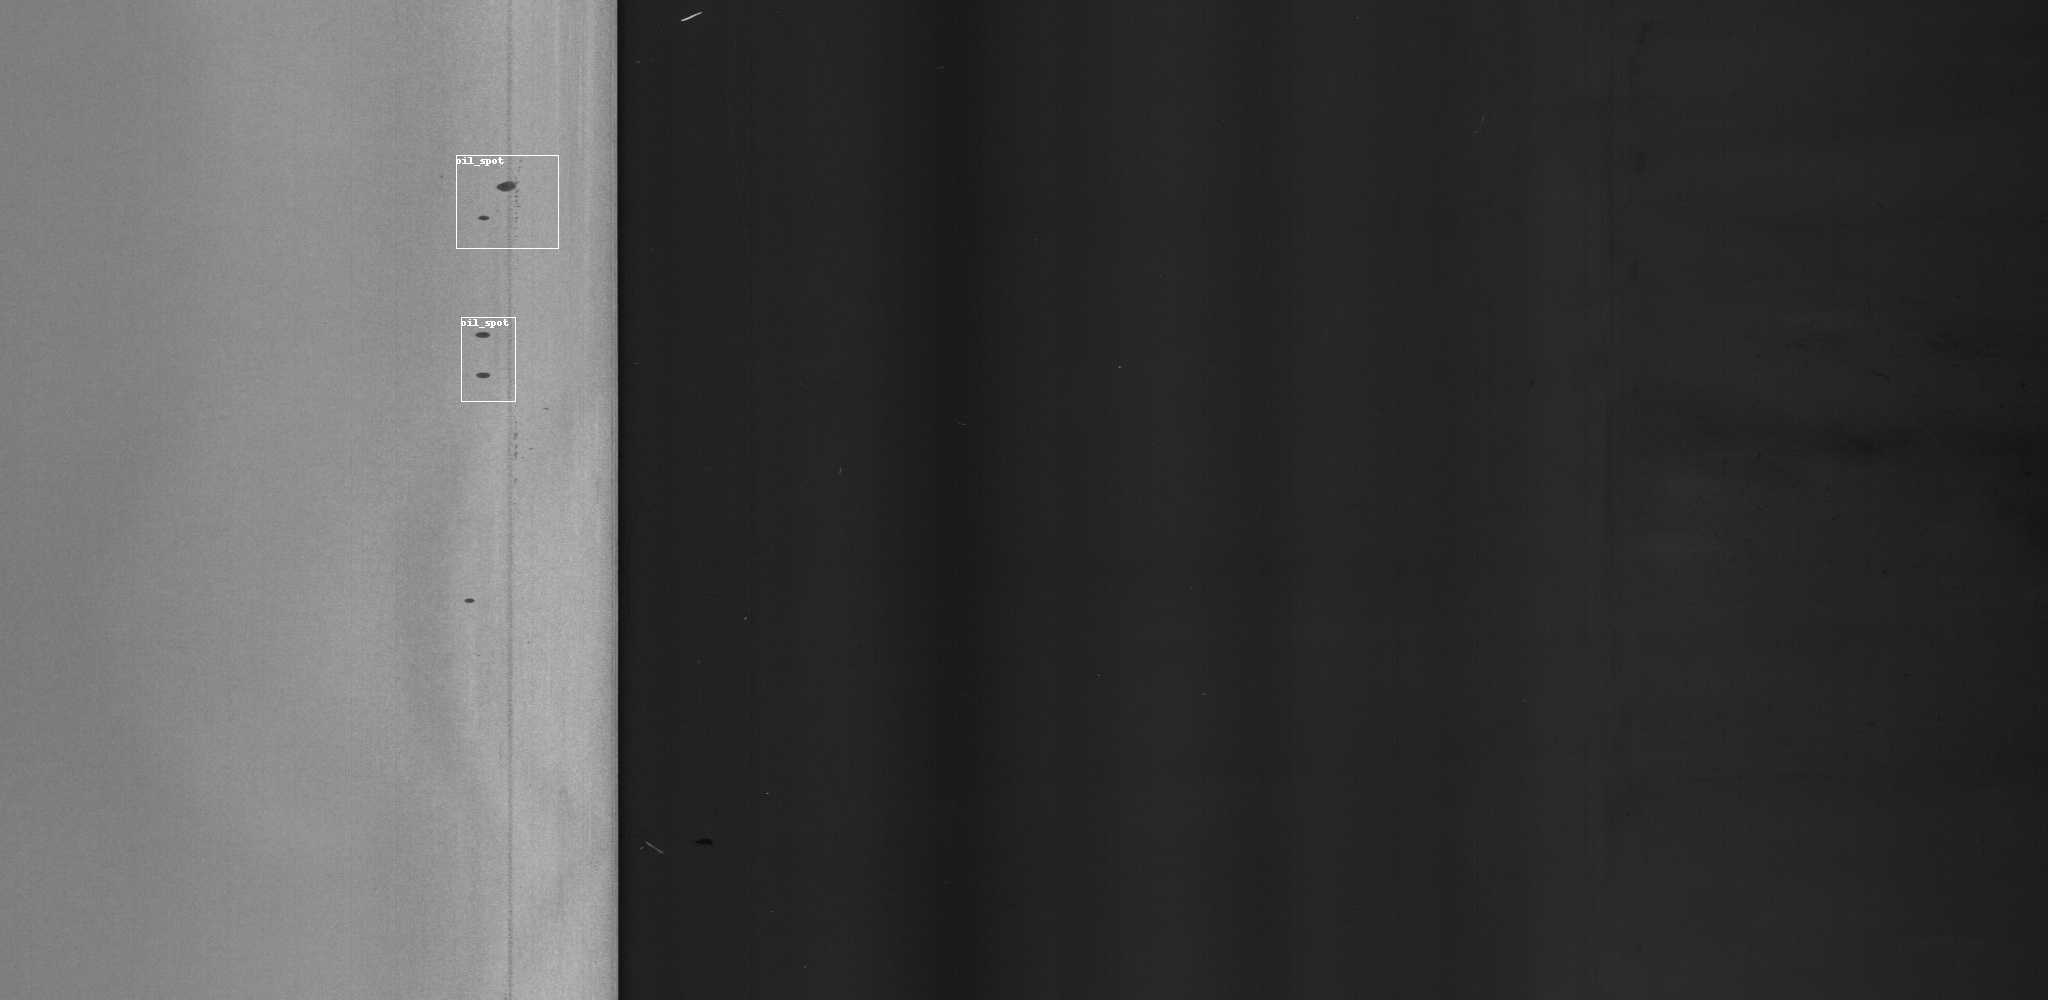

In [17]:
import numpy as np
from PIL import Image, ImageDraw

image_ids = train_dataset.coco.getImgIds()
image_id = image_ids[np.random.randint(0, len(image_ids))]

#image_id = 723
print('Image n°{}'.format(image_id))
image = train_dataset.coco.loadImgs(image_id)[0]
image = Image.open(os.path.join('/kaggle/working/train', image['file_name']))

annotations = train_dataset.coco.imgToAnns[image_id]
draw = ImageDraw.Draw(image)

cats = train_dataset.coco.cats
id2label = {k: v['name'] for k,v in cats.items()}
#print(id2label)

for annotation in annotations:
    box = annotation['bbox']
    class_idx = annotation['category_id']
    x,y,w,h = tuple(box)
    print(x,y,w,h)
    draw.rectangle((x,y,x+w,y+h), outline='white', width=1)
    draw.text((x, y), id2label[class_idx], fill='white')

image

In [18]:
from torch.utils.data import DataLoader

def collate_fn(batch):
    pixel_values = [item[0] for item in batch]
    encoding = processor.pad(pixel_values, return_tensors="pt")
    labels = [item[1] for item in batch]
    batch = {}
    batch['pixel_values'] = encoding['pixel_values']
    batch['pixel_mask'] = encoding['pixel_mask']
    batch['labels'] = labels
    return batch

train_dataloader = DataLoader(train_dataset, num_workers=3, collate_fn=collate_fn, batch_size=2, shuffle=True)
test_dataloader = DataLoader(test_dataset, num_workers=3, collate_fn=collate_fn, batch_size=2)
val_dataloader = DataLoader(val_dataset, num_workers=3, collate_fn=collate_fn, batch_size=2)
batch = next(iter(train_dataloader))

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


In [ ]:
# from transformers import AutoModelForObjectDetection

# model = AutoModelForObjectDetection.from_pretrained('facebook/detr-resnet-50', id2label=id2label, label2id=label2id, ignore_mismatched_sizes=True,revision="no_timm")

In [ ]:
pixel_values, target = train_dataset[0]
pixel_values

In [ ]:
print(target)

In [19]:
!pip install -q pytorch-lightning

In [20]:
import pytorch_lightning as pl
from transformers import DetrForObjectDetection
import torch

class Detr(pl.LightningModule):
    def __init__(self, lr, lr_backbone, weight_decay):
        super().__init__()
        self.model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50",revision="no_timm",
                                                             num_labels=len(id2label),
                                                             ignore_mismatched_sizes=True)
        self.lr = lr
        self.lr_backbone = lr_backbone
        self.weight_decay = weight_decay

    def forward(self, pixel_values, pixel_mask):
        outputs = self.model(pixel_values=pixel_values, pixel_mask=pixel_mask)

        return outputs

    def common_step(self, batch, batch_idx):
        pixel_values = batch["pixel_values"]
        pixel_mask = batch["pixel_mask"]
        labels = [{k: v.to(self.device) for k, v in t.items()} for t in batch["labels"]]
        
        outputs = self.model(pixel_values=pixel_values, pixel_mask=pixel_mask, labels=labels)
        
        loss = outputs.loss
        loss_dict = outputs.loss_dict

        return loss, loss_dict

    def training_step(self, batch, batch_idx):
        loss, loss_dict = self.common_step(batch, batch_idx)
        #print('batch', batch, batch.shape)
        self.log("training_loss", loss, batch_size=2)
        for k,v in loss_dict.items():
            #print(k, v)
            self.log("train_" + k, v.item(), batch_size=2)

        return loss

    def validation_step(self, batch, batch_idx):
        loss, loss_dict = self.common_step(batch, batch_idx)
        
        self.log("validation_loss", loss, batch_size=2)
        for k,v in loss_dict.items():
            #print(k, v)
            self.log("validation_" + k, v.item(), batch_size=2)

        return loss

    def configure_optimizers(self):
        param_dicts = [
              {"params": [p for n, p in self.named_parameters() if "backbone" not in n and p.requires_grad]},
              {
                  "params": [p for n, p in self.named_parameters() if "backbone" in n and p.requires_grad],
                  "lr": self.lr_backbone,
              },
        ]
        optimizer = torch.optim.AdamW(param_dicts, lr=self.lr,
                                  weight_decay=self.weight_decay)
        return optimizer

    def train_dataloader(self):
        return train_dataloader

    def val_dataloader(self):
        return val_dataloader

In [ ]:
# from torch.utils.tensorboard import SummaryWriter
# log_dir = "/kaggle/working/logs"
# writer = SummaryWriter(log_dir=log_dir)
# writer.add_scalar("loss/train", training_loss, global_step=epoch)
# writer.add_scalar("loss/val", validation_loss, global_step=epoch)

In [ ]:
!pip show tensorboard

In [ ]:
%load_ext tensorboard
%tensorboard --logdir lightning_logs/
#%reload_ext tensorboard

In [21]:
model = Detr(lr=1e-4, lr_backbone=1e-5, weight_decay=1e-4)


outputs = model(pixel_values=batch['pixel_values'], pixel_mask=batch['pixel_mask'])

config.json:   0%|          | 0.00/6.60k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Some weights of DetrForObjectDetection were not initialized from the model checkpoint at facebook/detr-resnet-50 and are newly initialized because the shapes did not match:
- class_labels_classifier.weight: found shape torch.Size([92, 256]) in the checkpoint and torch.Size([11, 256]) in the model instantiated
- class_labels_classifier.bias: found shape torch.Size([92]) in the checkpoint and torch.Size([11]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# # outputs.logits.shape
# from pytorch_lightning.callbacks import EarlyStopping

# # Создание экземпляра колбэка EarlyStopping
# early_stop_callback = EarlyStopping(
#     monitor='validation_loss', 
#     patience=10,          
#     verbose=True,  
#     mode='min'        
# )

In [22]:
from pytorch_lightning import Trainer

trainer = Trainer(devices = 1, accelerator = "gpu", gradient_clip_val = 0.1,  max_epochs = 20) #, accumulate_grad_batches=8)#callbacks=[early_stop_callback])
trainer.fit(model)

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


Training: |          | 0/? [00:00<?, ?it/s]

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


Validation: |          | 0/? [00:00<?, ?it/s]

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


Validation: |          | 0/? [00:00<?, ?it/s]

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


Validation: |          | 0/? [00:00<?, ?it/s]

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


Validation: |          | 0/? [00:00<?, ?it/s]

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


Validation: |          | 0/? [00:00<?, ?it/s]

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


Validation: |          | 0/? [00:00<?, ?it/s]

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


Validation: |          | 0/? [00:00<?, ?it/s]

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


Validation: |          | 0/? [00:00<?, ?it/s]

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


Validation: |          | 0/? [00:00<?, ?it/s]

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


Validation: |          | 0/? [00:00<?, ?it/s]

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


Validation: |          | 0/? [00:00<?, ?it/s]

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


Validation: |          | 0/? [00:00<?, ?it/s]

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


Validation: |          | 0/? [00:00<?, ?it/s]

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


Validation: |          | 0/? [00:00<?, ?it/s]

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


Validation: |          | 0/? [00:00<?, ?it/s]

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


Validation: |          | 0/? [00:00<?, ?it/s]

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


Validation: |          | 0/? [00:00<?, ?it/s]

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


Validation: |          | 0/? [00:00<?, ?it/s]

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


Validation: |          | 0/? [00:00<?, ?it/s]

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


Validation: |          | 0/? [00:00<?, ?it/s]

In [23]:
# model_path = 'custom_model'
# model.model.save_pretrained(model_path)

# model = DetrForObjectDetection.from_pretrained(model_path)
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model.to(device)
model.eval()

Detr(
  (model): DetrForObjectDetection(
    (model): DetrModel(
      (backbone): DetrConvModel(
        (conv_encoder): DetrConvEncoder(
          (model): ResNetBackbone(
            (embedder): ResNetEmbeddings(
              (embedder): ResNetConvLayer(
                (convolution): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
                (normalization): DetrFrozenBatchNorm2d()
                (activation): ReLU()
              )
              (pooler): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
            )
            (encoder): ResNetEncoder(
              (stages): ModuleList(
                (0): ResNetStage(
                  (layers): Sequential(
                    (0): ResNetBottleNeckLayer(
                      (shortcut): ResNetShortCut(
                        (convolution): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                        (normalization): DetrFrozenBatchNorm2d

In [24]:
!pip install -q coco-eval

In [25]:
def convert_to_xywh(boxes):
    xmin, ymin, xmax, ymax = boxes.unbind(1)
    return torch.stack((xmin, ymin, xmax - xmin, ymax - ymin), dim=1)

def prepare_for_coco_detection(predictions):
    coco_results = []
    for original_id, prediction in predictions.items():
        if len(prediction) == 0:
            continue

        boxes = prediction["boxes"]
        boxes = convert_to_xywh(boxes).tolist()
        scores = prediction["scores"].tolist()
        labels = prediction["labels"].tolist()

        coco_results.extend(
            [
                {
                    "image_id": original_id,
                    "category_id": labels[k],
                    "bbox": box,
                    "score": scores[k],
                }
                for k, box in enumerate(boxes)
            ]
        )
    return coco_results

In [26]:
from coco_eval import CocoEvaluator
from tqdm.notebook import tqdm

import numpy as np

evaluator = CocoEvaluator(coco_gt=test_dataset.coco, iou_types=["bbox"])

for idx, batch in enumerate(tqdm(test_dataloader)):
    pixel_values = batch["pixel_values"].to(device)
    pixel_mask = batch["pixel_mask"].to(device)
    labels = [{k: v.to(device) for k, v in t.items()} for t in batch["labels"]]
    

    with torch.no_grad():
        outputs = model(pixel_values=pixel_values, pixel_mask=pixel_mask)

    orig_target_sizes = torch.stack([target["orig_size"] for target in labels], dim=0)
    results = processor.post_process_object_detection(outputs, target_sizes=orig_target_sizes, threshold=0)

    predictions = {target['image_id'].item(): output for target, output in zip(labels, results)}
    #print(predictions)
    predictions = prepare_for_coco_detection(predictions)
    evaluator.update(predictions)

evaluator.synchronize_between_processes()
evaluator.accumulate()
evaluator.summarize()


  0%|          | 0/171 [00:00<?, ?it/s]

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


Accumulating evaluation results...
DONE (t=0.48s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.051
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.123
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.025
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.019
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.073
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.117
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.259
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.300
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.141
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= la

In [34]:
import torch
import matplotlib.pyplot as plt

# colors for visualization
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]

# for output bounding box post-processing
def box_cxcywh_to_xyxy(x):
    x_c, y_c, w, h = x.unbind(1)
    b = [(x_c - 0.5 * w), (y_c - 0.5 * h),
         (x_c + 0.5 * w), (y_c + 0.5 * h)]
    return torch.stack(b, dim=1)

def rescale_bboxes(out_bbox, size):
    img_w, img_h = size
    b = box_cxcywh_to_xyxy(out_bbox)
    b = b * torch.tensor([img_w, img_h, img_w, img_h], dtype=torch.float32)
    return b
def plot_results(pil_img, prob, boxes):
    plt.figure(figsize=(16,10))
    plt.imshow(pil_img)
    ax = plt.gca()
    colors = COLORS * 100
    for p, (xmin, ymin, xmax, ymax), c in zip(prob, boxes.tolist(), colors):
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                   fill=False, color=c, linewidth=3))
        cl = p.argmax()
        text = f'{id2label[cl.item()]}: {p[cl]:0.2f}'
        ax.text(xmin, ymin, text, fontsize=15,
                bbox=dict(facecolor='yellow', alpha=0.5))
    plt.axis('off')
    plt.show()

In [36]:
def visualize_predictions(image, outputs, threshold=0.1, keep_highest_scoring_bbox=False):
    # keep only predictions with confidence >= threshold
    probas = outputs.logits.softmax(-1)[0, :, :-1]
    keep = probas.max(-1).values > threshold
    if keep_highest_scoring_bbox:
        keep = probas.max(-1).values.argmax()
        keep = torch.tensor([keep])

    # convert predicted boxes from [0; 1] to image scales
    bboxes_scaled = rescale_bboxes(outputs.pred_boxes[0, keep].cpu(), image.size)

    # plot results
    plot_results(image, probas[keep], bboxes_scaled)

In [37]:
it = iter(range(1500))

torch.Size([1, 3, 651, 1333])


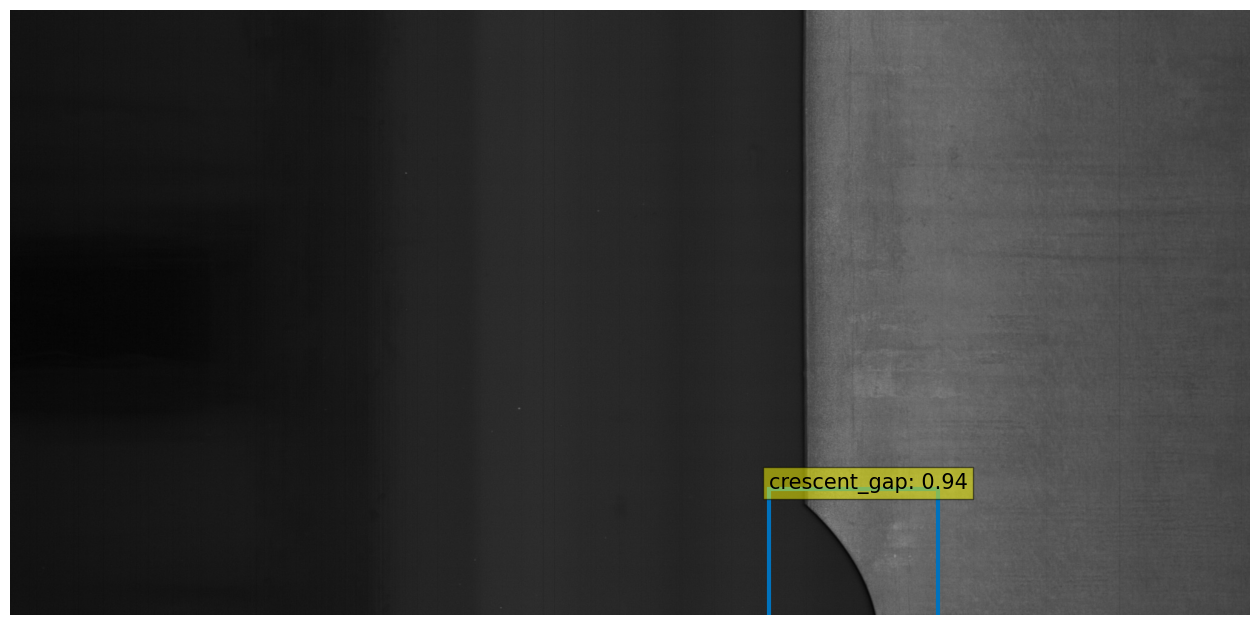

In [41]:
#We can use the image_id in target to know which image it is
pixel_values, target = test_dataset[next(it)]

pixel_values = pixel_values.unsqueeze(0).to(device)
print(pixel_values.shape)

# forward pass to get class logits and bounding boxes
outputs = model(pixel_values=pixel_values, pixel_mask=None)

image_id = target['image_id'].item()
image = test_dataset.coco.loadImgs(image_id)[0]
image = Image.open(os.path.join(f'/kaggle/working/test', image['file_name']))

visualize_predictions(image, outputs, threshold=0.3, keep_highest_scoring_bbox=True)